In [1]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
import joblib

In [2]:
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [3]:
df_train=pd.read_csv("StudentPerformance.csv")

In [4]:
df_train.head()

,Student_id,gender,parental level of education,test preparation course,Software Engineering score,Machine Learningscore,DBMS score,Elective 1 score,Elective 2 score,Attendance,Study hours/Day,Assignment marks,Time spent on social media in mins,Participation in extra cirricular activities,Current Sem percentage,Pass/Fail,Previous sem percentage
0,1,female,bachelor's degree,none,72,72,74,88,69,86.0,3,15,90,no,75.0,Pass,83
1,2,female,some college,completed,69,90,88,76,63,86.0,1,15,90,yes,77.2,Pass,94
2,3,female,master's degree,none,90,95,93,95,56,86.0,2,15,90,no,85.8,Pass,70
3,4,male,associate's degree,Partialy completed,47,57,44,94,40,85.0,2,15,90,yes,56.4,Fail,70
4,5,male,some college,none,76,78,75,77,97,86.0,2,15,90,no,80.6,Pass,67


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Student_id                                    1014 non-null   int64  
 1   gender                                        1014 non-null   object 
 2   parental level of education                   1014 non-null   object 
 3   test preparation course                       1014 non-null   object 
 4   Software Engineering score                    1014 non-null   int64  
 5   Machine Learningscore                         1014 non-null   int64  
 6   DBMS score                                    1014 non-null   int64  
 7   Elective 1 score                              1014 non-null   int64  
 8   Elective 2 score                              1014 non-null   int64  
 9   Attendance                                    1014 non-null   f

In [6]:
df_train.columns

Index(['Student_id', 'gender', 'parental level of education',
       'test preparation course', 'Software Engineering score',
       'Machine Learningscore', 'DBMS score', 'Elective 1 score',
       'Elective 2 score', 'Attendance', 'Study hours/Day', 'Assignment marks',
       'Time spent on social media in mins',
       'Participation in extra cirricular activities',
       'Current Sem percentage', 'Pass/Fail', 'Previous sem percentage'],
      dtype='object')

In [7]:
def getLabelCount(df,target):
    return sorted([( labelValue,len(df.loc[df[target] == labelValue]) ) for labelValue in df[target].unique()])
TARGET = "Pass/Fail"
labelCount = getLabelCount(df_train,TARGET)
labelCount

[('Fail', 442), ('Pass', 572)]

<AxesSubplot:>

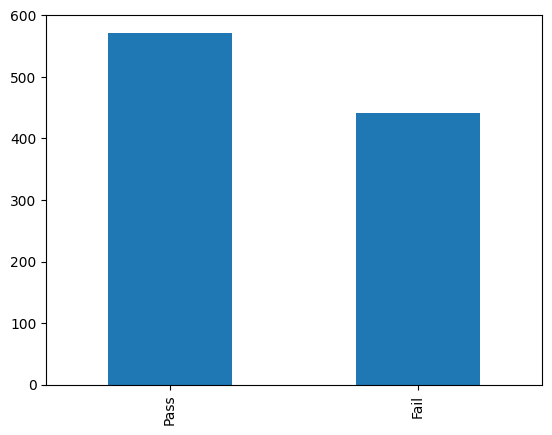

In [8]:
df_train['Pass/Fail'].value_counts().plot(kind='bar')

In [9]:
def dynamic_label_encode(df):
    encoded_df = df.copy()
    label_encoders = {}

    for column in df.select_dtypes(include=['object']).columns:
        le = preprocessing.LabelEncoder()
        encoded_df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return encoded_df, label_encoders

encoded_df, label_encoders = dynamic_label_encode(df_train)

In [10]:
label_encoders

{'gender': LabelEncoder(),
 'parental level of education': LabelEncoder(),
 'test preparation course': LabelEncoder(),
 'Participation in extra cirricular activities': LabelEncoder(),
 'Pass/Fail': LabelEncoder()}

In [11]:
b=encoded_df
b.to_csv("preprocess.csv")
encoded_df

,Student_id,gender,parental level of education,test preparation course,Software Engineering score,Machine Learningscore,DBMS score,Elective 1 score,Elective 2 score,Attendance,Study hours/Day,Assignment marks,Time spent on social media in mins,Participation in extra cirricular activities,Current Sem percentage,Pass/Fail,Previous sem percentage
0,1,0,1,3,72,72,74,88,69,86.0,3,15,90,0,75.0,1,83
1,2,0,4,2,69,90,88,76,63,86.0,1,15,90,2,77.2,1,94
2,3,0,3,3,90,95,93,95,56,86.0,2,15,90,0,85.8,1,70
3,4,1,0,1,47,57,44,94,40,85.0,2,15,90,2,56.4,0,70
4,5,1,4,3,76,78,75,77,97,86.0,2,15,90,0,80.6,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,1010,1,1,3,77,63,73,73,57,87.0,6,16,75,1,68.6,1,80
1010,1011,1,1,0,73,88,77,74,88,90.0,4,19,75,0,80.0,1,89
1011,1012,0,1,3,78,70,81,75,83,80.0,3,15,150,1,77.4,1,77
1012,1013,0,1,3,70,70,80,60,80,91.0,3,17,25,0,72.0,1,75


In [12]:
df_numerics_only = df_train.select_dtypes(include=np.number)

In [13]:
to_scale = [col for col in encoded_df.columns if encoded_df[col].max()>1]

In [14]:
to_scale.remove('Current Sem percentage')

In [15]:
scaler = RobustScaler()
scaled =scaler.fit_transform(encoded_df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    encoded_df[col] = scaled[col]

In [16]:
# Mean (center) for each feature
mean_values = scaler.center_

# Scale factor for each feature
scale_factors = scaler.scale_

print(np.average(mean_values))
print(np.average(scale_factors))

77.46428571428571
51.42857142857143


In [17]:
to_scale

['Student_id',
 'parental level of education',
 'test preparation course',
 'Software Engineering score',
 'Machine Learningscore',
 'DBMS score',
 'Elective 1 score',
 'Elective 2 score',
 'Attendance',
 'Study hours/Day',
 'Assignment marks',
 'Time spent on social media in mins',
 'Participation in extra cirricular activities',
 'Previous sem percentage']

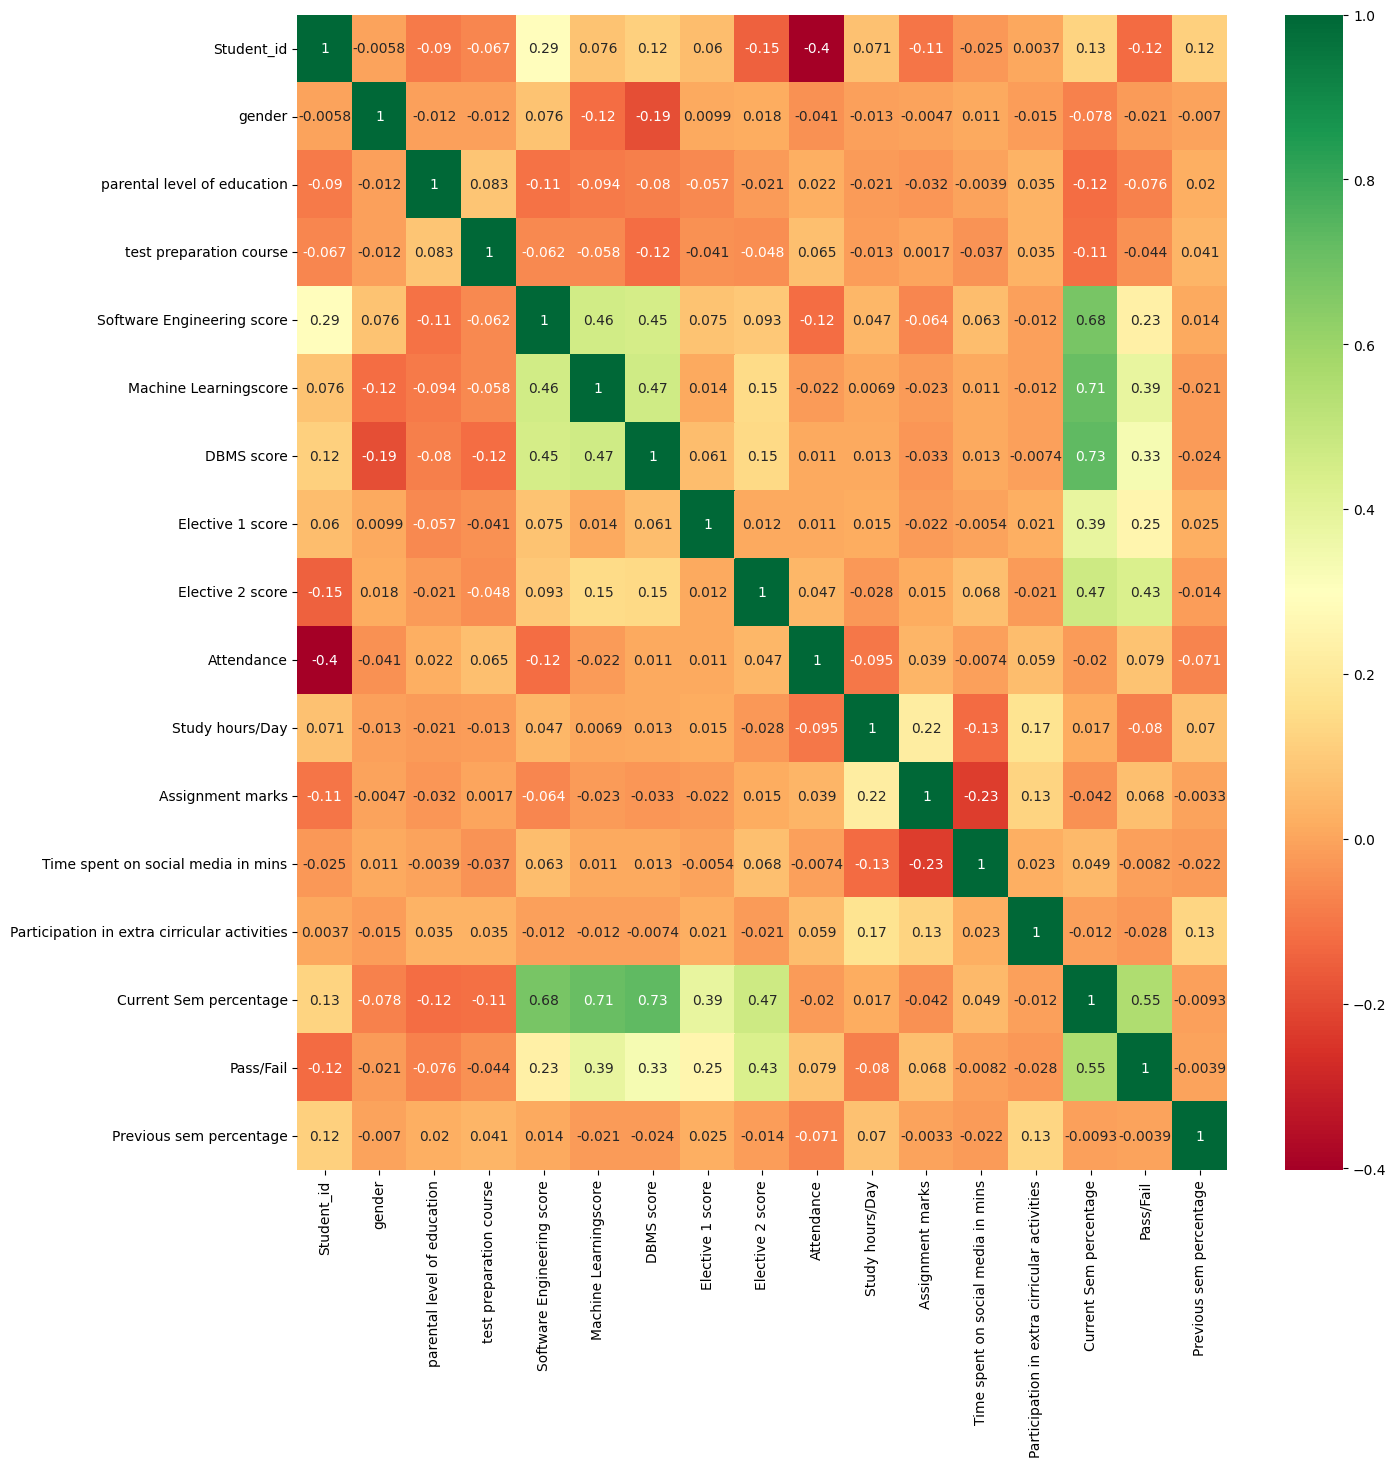

In [18]:
corrmat = encoded_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(encoded_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
X=encoded_df.drop(["Pass/Fail",'Current Sem percentage','Student_id'], axis=1)
Y=encoded_df["Current Sem percentage"]
print(X.shape)
print(Y.shape)

(1014, 14)
(1014,)


In [20]:
Y

0       75.0
1       77.2
2       85.8
3       56.4
4       80.6
        ... 
1009    68.6
1010    80.0
1011    77.4
1012    72.0
1013    63.6
Name: Current Sem percentage, Length: 1014, dtype: float64

In [21]:
# sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train_new,X_test,y_train_new,y_test = train_test_split(X, Y, test_size = 0.1, random_state = 12)

In [22]:
print(X_train_new.shape)
print(y_train_new.shape)

(912, 14)
(912,)


In [23]:
# !pip install -U imbalanced-learn

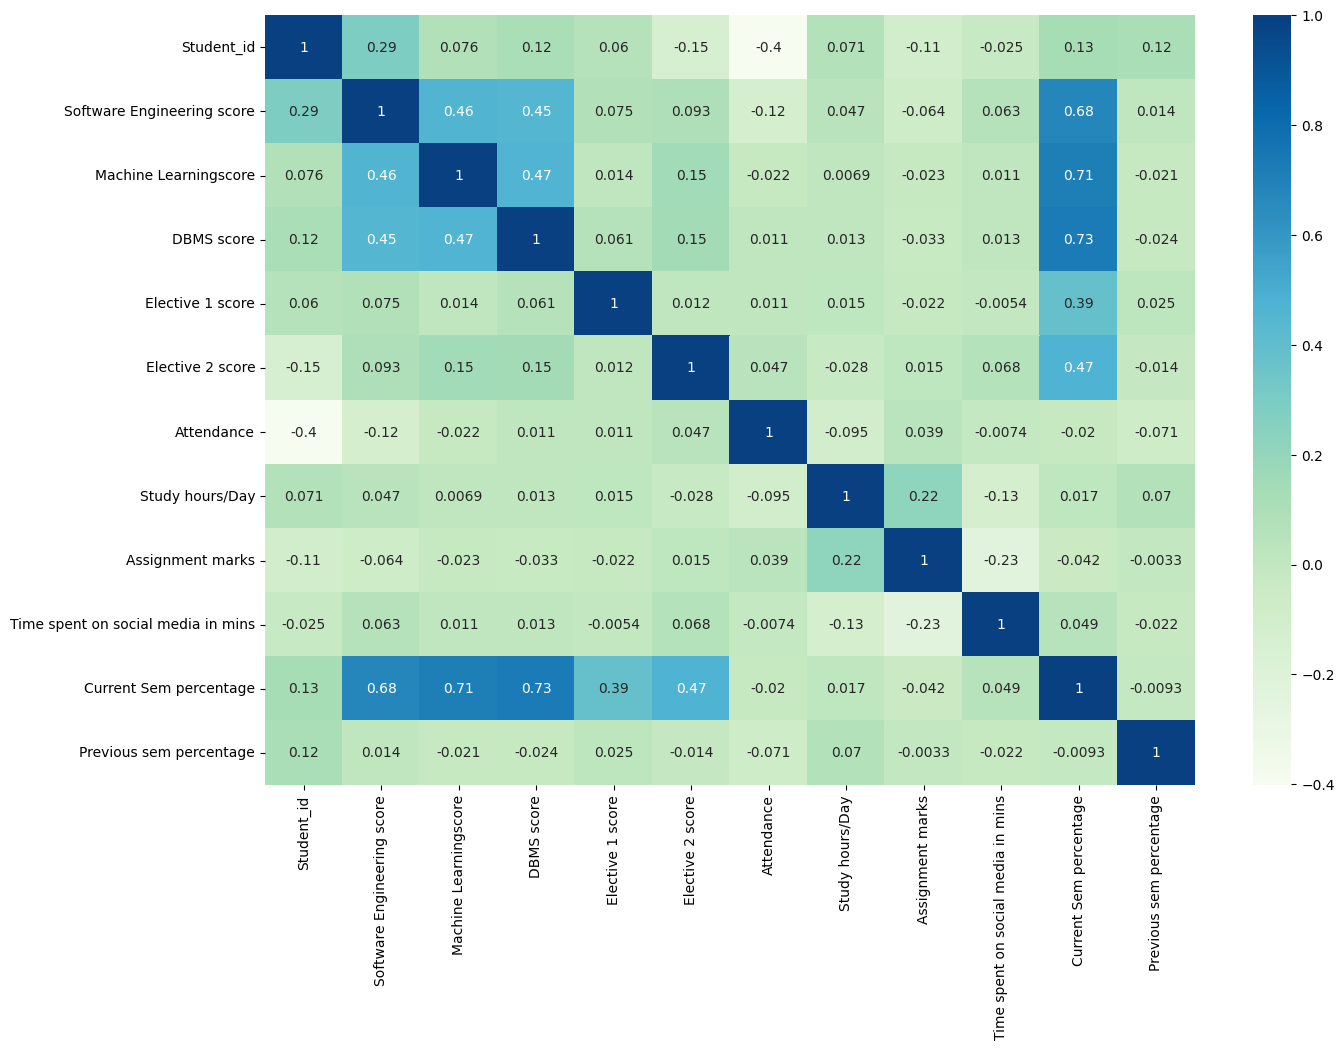

In [24]:
plt.figure(figsize= (15, 10))
sns.heatmap(df_numerics_only.corr(), annot=True, cmap= 'GnBu')
plt.show()

# KNeighborsRegressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.metrics import mean_squared_error,r2_score
classifier= KNeighborsRegressor(n_neighbors=5)  
classifier.fit(X_train_new, y_train_new) 

KNeighborsRegressor()

In [26]:
y_pred4=classifier.predict(X_test)

In [27]:
print("mean_squared_error KNN:",mean_squared_error(y_test, y_pred4))
r2 = r2_score(y_test, y_pred4)
print(f"R-squared score: {r2}")

# Save the trained model to a file using joblib
model_filename2 = "models/KNN_Regressor_model.joblib"
joblib.dump(classifier, model_filename2)
print(f"Model saved as {model_filename2}")

mean_squared_error KNN: 12.580501960784316
R-squared score: 0.8381807220353754
Model saved as models/KNN_Regressor_model.joblib


In [28]:
y_test

116     71.6
3       56.4
366     56.6
422     61.2
367     60.0
        ... 
1000    77.0
826     60.8
193     70.2
129     65.2
263     87.6
Name: Current Sem percentage, Length: 102, dtype: float64

In [29]:
y_pred4

array([72.4 , 55.04, 59.8 , 61.56, 58.76, 60.88, 66.2 , 61.84, 69.28,
       60.2 , 72.88, 64.36, 69.68, 72.  , 57.12, 66.36, 70.52, 72.6 ,
       70.  , 69.44, 63.96, 67.16, 68.24, 57.56, 55.  , 75.8 , 74.84,
       78.28, 72.52, 65.04, 64.08, 63.  , 69.64, 53.2 , 63.64, 65.32,
       65.04, 65.56, 61.36, 56.92, 63.52, 73.72, 72.28, 68.84, 59.68,
       59.32, 66.88, 67.32, 69.64, 67.2 , 76.4 , 69.92, 69.36, 66.84,
       67.16, 68.84, 71.68, 58.88, 56.08, 72.56, 57.6 , 63.32, 72.08,
       63.84, 68.48, 57.4 , 65.56, 74.84, 54.72, 68.4 , 69.12, 78.84,
       58.88, 63.8 , 73.84, 58.4 , 79.88, 70.84, 72.56, 65.8 , 71.92,
       60.4 , 71.6 , 70.08, 67.68, 63.84, 58.88, 62.  , 56.4 , 47.92,
       69.8 , 71.84, 60.68, 81.56, 54.  , 69.6 , 64.24, 74.36, 62.44,
       71.56, 65.08, 81.68])

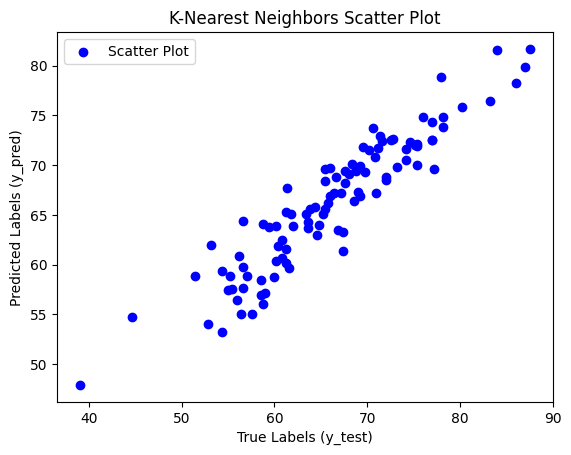

In [30]:
import matplotlib.pyplot as plt

# Assuming you have imported y_test and y_pred from your KNN model
# y_test contains the true labels, and y_pred contains the predicted labels.

# Create a scatter plot
plt.scatter(y_test, y_pred4, c='blue', label='Scatter Plot')

# Add labels and title
plt.xlabel('True Labels (y_test)')
plt.ylabel('Predicted Labels (y_pred)')
plt.title('K-Nearest Neighbors Scatter Plot')

# Show the legend
plt.legend(loc='best')
plt.savefig('Scatter.jpg')
# Show the plot
plt.show()

In [31]:
# # Load the saved model using joblib
# loaded_model2 = joblib.load(model_filename2)

# # Make predictions using the loaded model
# new_predictions = loaded_model2.predict(X_test)

# DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()

# Fit the model to your training data
clf.fit(X_train_new, y_train_new)

DecisionTreeRegressor()

In [33]:
y_pred1 = clf.predict(X_test)

In [34]:
print("mean_squared_error DecisionTree:",mean_squared_error(y_test, y_pred1))
r3 = r2_score(y_test, y_pred1)
print(f"R-squared score: {r3}")

# Save the trained model to a file using joblib
model_filename3 = "models/DecisionTree_Regressor_model.joblib"
joblib.dump(clf, model_filename3)
print(f"Model saved as {model_filename3}")

mean_squared_error DecisionTree: 20.918823529411767
R-squared score: 0.7309273564798383
Model saved as models/DecisionTree_Regressor_model.joblib


In [35]:
# # Load the saved model using joblib
# loaded_model3 = joblib.load(model_filename3)

# # Make predictions using the loaded model
# new_predictions = loaded_model3.predict(X_test)

# SVC

In [36]:
from sklearn.svm import SVR
model = SVR(kernel='linear')  # You can choose different kernel functions like 'linear', 'rbf', etc.

# Train the model on the training data
model.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred2 = model.predict(X_test)

In [37]:
from sklearn import metrics
print("mean_squared_error SVC:",mean_squared_error(y_test, y_pred2))
r4 = r2_score(y_test, y_pred2)
print(f"R-squared score: {r4}")

# Save the trained model to a file using joblib
model_filename4 = "models/SVC_Regressor_model.joblib"
joblib.dump(model, model_filename4)
print(f"Model saved as {model_filename4}")

mean_squared_error SVC: 0.0016354521946965108
R-squared score: 0.9999789636618541
Model saved as models/SVC_Regressor_model.joblib


In [38]:
# # Load the saved model using joblib
# loaded_model4 = joblib.load(model_filename4)

# # Make predictions using the loaded model
# new_predictions = loaded_model4.predict(X_test)

# RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor  # for regression

reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)

reg.fit(X_train_new, y_train_new)  # for regression
y_pred5 = reg.predict(X_test)

In [40]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
print("mean_squared_error SVC:",mean_squared_error(y_test, y_pred5))
r4 = r2_score(y_test, y_pred5)
print(f"R-squared score: {r4}")

# Save the trained model to a file using joblib
model_filename5 = "models/RandomForest_Regressor_model.joblib"
joblib.dump(reg, model_filename5)
print(f"Model saved as {model_filename5}")

mean_squared_error SVC: 4.07865734665055
R-squared score: 0.9475374361883604
Model saved as models/RandomForest_Regressor_model.joblib


In [41]:
# # Load the saved model using joblib
# loaded_model5 = joblib.load(model_filename5)

# # Make predictions using the loaded model
# new_predictions = loaded_model5.predict(X_test)

# Logistic Regression

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [43]:
y_train_new=y_train_new.astype(int)
y_train_new

980     67
631     66
474     81
1009    68
29      71
        ..
241     79
253     74
390     69
667     73
843     66
Name: Current Sem percentage, Length: 912, dtype: int32

In [44]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred9 = model.predict(X_test)

In [45]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
print("mean_squared_error SVC:",mean_squared_error(y_test, y_pred9))
r9 = r2_score(y_test, y_pred9)
print(f"R-squared score: {r9}")

# Save the trained model to a file using joblib
model_filename9 = "models/Logistic_Regression_model.joblib"
joblib.dump(model, model_filename9)
print(f"Model saved as {model_filename9}")

mean_squared_error SVC: 17.67490196078431
R-squared score: 0.7726529607240462
Model saved as models/Logistic_Regression_model.joblib
